In [90]:
import sys
assert sys.version_info >= (3, 5)
import tensorflow as tf
from tensorflow import keras

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [91]:
def makemodel(x_train, y_train, x_test, y_test, weight_init) :
    model = keras.models.Sequential()

    model.add(keras.layers.Flatten(input_shape = [8, 8]))
    model.add(keras.layers.Dense(300, kernel_initializer= weight_init, activation= "relu"))
    model.add(keras.layers.Dense(100, kernel_initializer= weight_init, activation= "relu"))
    model.add(keras.layers.Dense(10, kernel_initializer= weight_init, activation= "softmax"))

    model.summary()

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

    return model

In [92]:
def modelpredict(model, x_train, y_train, x_test, y_test) :
    tb_hist = keras.callbacks.TensorBoard(log_dir = './graph', histogram_freq = 0, write_graph = True, write_images = True)
    start = time.time()
    history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), callbacks = [tb_hist])
    print("time : ", time.time() - start)
    return history

In [93]:
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.show()

In [94]:
def different_model() :
    digits = load_digits()
    x_data = digits.data
    y_data = digits.target

    x_data = (np.expand_dims(x_data, axis = 1)).reshape(1797, 8, 8)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

    model_xavier = makemodel(x_train, y_train, x_test, y_test, 'glorot_uniform')
    model_normal = makemodel(x_train, y_train, x_test, y_test, 'RandomNormal')

    hist_xavier = modelpredict(model_xavier, x_train, y_train, x_test, y_test)
    hist_normal = modelpredict(model_normal, x_train, y_train, x_test, y_test)

    plot_history([('Xavier', hist_xavier), ('Random', hist_normal)])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 300)               19500     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
Total params: 50,610
Trainable params: 50,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 64)                0         
__________________________

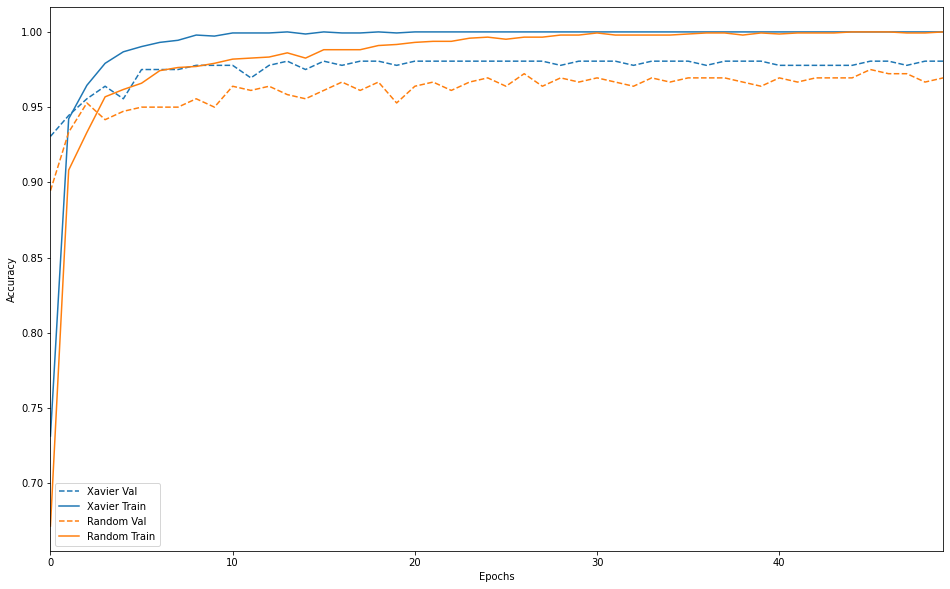

In [95]:
different_model()

In [96]:
def scaled() :
    digits = load_digits()
    x_data = digits.data
    y_data = digits.target

    x_data = (np.expand_dims(x_data, axis = 1)).reshape(1797, 8, 8)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

    x_data = digits.data

    scaler = MinMaxScaler()
    scaler.fit(x_data)
    scaled = scaler.transform(x_data)

    scaled = (np.expand_dims(scaled, axis = 1)).reshape(1797, 8, 8) 
    s_train, s_test, y_train, y_test = train_test_split(scaled, y_data, test_size = 0.2)

    model = makemodel(x_train, y_train, x_test, y_test, "RandomNormal")
    model_scaled = makemodel(s_train, y_train, s_test, y_test, "RandomNormal")

    hist = modelpredict(model, x_train, y_train, x_test, y_test)
    hist_scaled = modelpredict(model_scaled, s_train, y_train, s_test, y_test)

    plot_history([('Normal', hist), ('Scaled', hist_scaled)])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 300)               19500     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1010      
Total params: 50,610
Trainable params: 50,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 64)                0         
__________________________

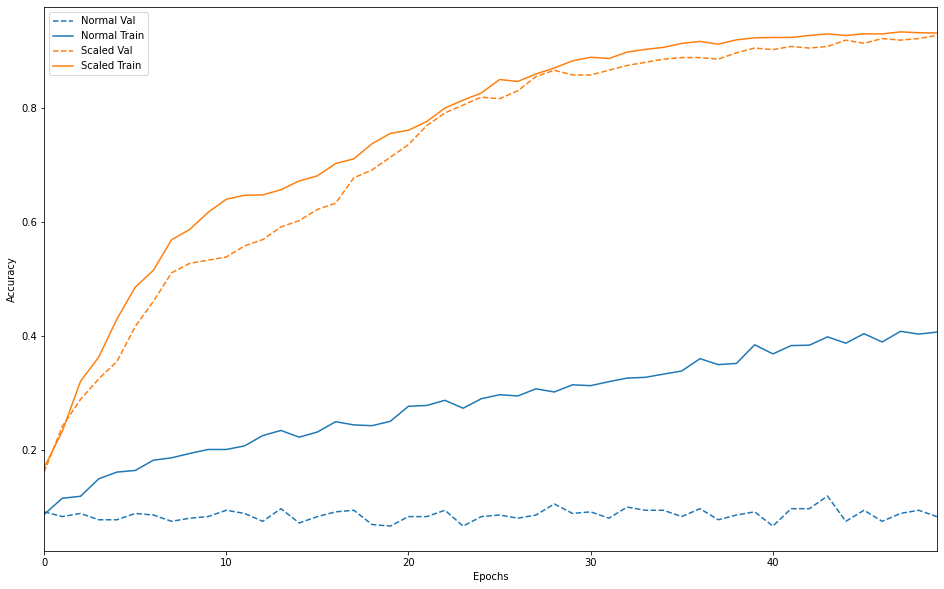

In [97]:
scaled()